#  <center> **<span style='color:red'>Metamodeling, INSA de Toulouse** </span> </center>

# Computer lab  <span style='color:blue'> Space-filling designs</span>

A. Marrel and O. Roustant

## EXERCISE 1) Maximin DoE

**Question 1.a)** Create a *maximin* design of experiments (DoE) on $[0, 1]^2$ with 9 points.<br/>
The random search optimization consists in generating at random a large number of uniform designs and to select the one that has the maximum value of the minimal distance between design points (called here *mindist* criterion). The function `mindist` (package `DiceDesign`) computes the mindist criterion.<br/>
Plot this DoE and compare it with a uniform design.

In [ ]:
rm(list = ls())
graphics.off()

library(randtoolbox)

library(DiceDesign)
help(package = "DiceDesign")
?mindist   # minimal distance in DoE

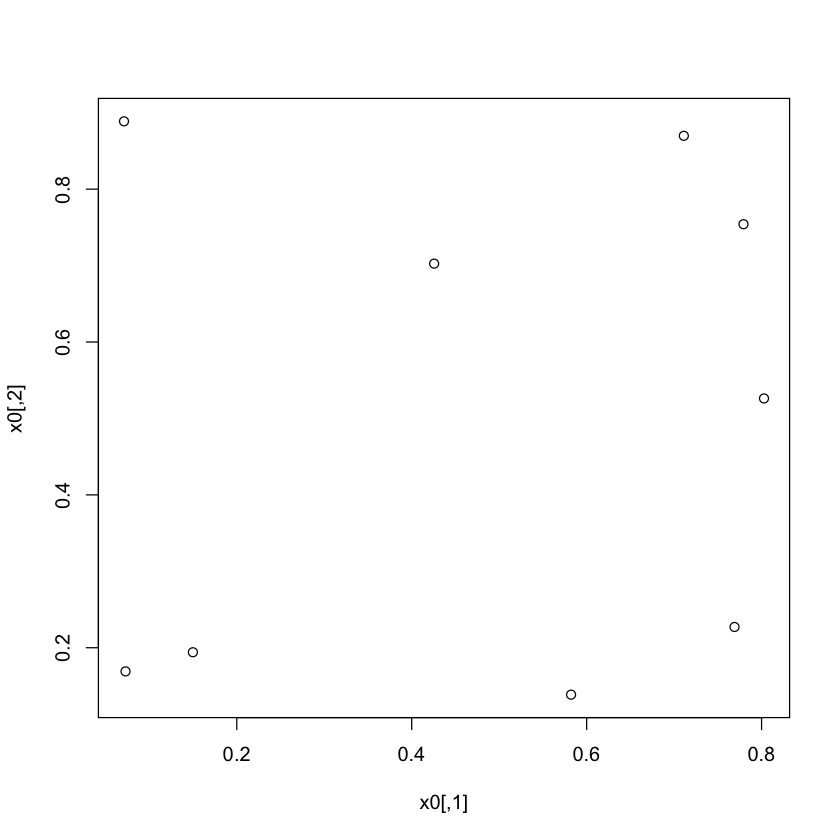

In [1]:
# generate a uniform design on [0, 1]^2
n <- 9
x0 <- matrix(runif(2*n), nrow = n, ncol = 2)
plot(x0)

In [ ]:
?runif
#?mindist

# implement a random search method to maximize the mindist criterion 
critere <- ??? # Initialise the mindist criterion

for (i in 1:1000){
  xnew <- ??? # Generate a new LHD candidate
  if ( ???) # Test if better, and update if yes
  { 
    x2 <- xnew
    critere <- ??
  }
}

# Print
par(mfrow = c(2,2))
plot(x, main = "Uniform DoE")
plot(x1, main = "Maximin DoE")
cat("Mindist criterion for the uniform DoE = ", mindist(x), "\n")
cat("Mindist criterion for the maximal DoE = ", mindist(x1), "\n")

**Question 1.b)** Create a 2D full factorial design (i.e. a grid) with 3 points per dimension. Use the function `factDesign()` of the package `DiceDesign`. Visualize this DoE, and compare it in terms of *mindist* criterion.

In [ ]:
?factDesign

In [ ]:
# Create a full factorial design
x2 <- ???  ...
x2 

# Comparison with previous results
par(mfrow = c(2,2)) 
plot(x, main = "Uniform DoE")
plot(x1, main = "Maximin DoE")
plot(x2$design, main = "Factorial DoE")

In [ ]:
# Minimal distance in DoE
cat("Mindist criterion for the uniform DoE = ", mindist(x), "\n")
cat("Mindist criterion for the maximal DoE = ", mindist(x1), "\n")
cat("Mindist criterion for the factorial DoE = ", mindist(x2), "\n")

**Question 1.c)** Although the factorial DoE may have a better maximin value, why is it not recommended to use it for exploring a deterministic computer code?

...

## EXERCISE 2) Low discrepancy sequences (LDS)

**Question 2.a)** Build a 2D Sobol LDS of $9$ points, using the function `sobol` of package `randtoolbox`. Plot this DoE and compare its *maximin* value.

In [ ]:
library(randtoolbox)
 ?sobol

In [ ]:
x3 <- ??? 
plot(x3, main = "Sobol")
cat("Mindist criterion for the Sobol LDS = ", mindist(x3), "\n")

**Question 2.b)** Compute the modified and centered discrepancy of this DoE and the three previous ones. Compare them. Use the function `discrepancyCriteria` of `DiceDesign`.

In [ ]:
?discrepancyCriteria

In [ ]:
dis_MC <- discrepancyCriteria( ?? , type = c('M2', 'C2')) 
dis_Maximin <- discrepancyCriteria( ?? , type = c('M2', 'C2')) 
dis_Fact <- discrepancyCriteria( ?? , type = c('M2', 'C2')) 
dis_Sobol <- discrepancyCriteria( ?? , type = c('M2', 'C2')) 
# Affichage des valeurs
cat("Discrepancy criteria M2 and C2 for the uniform DoE = ", dis_MC$DisM2, " - ", dis_MC$DisC2, "\n")
cat("Discrepancy criteria M2 and C2 for the maximin DoE = ", dis_Maximin$DisM2, " - ", dis_Maximin$DisC2, "\n")
cat("Discrepancy criteria M2 and C2 for the factorial DoE = ", dis_Fact $DisM2, " - ", dis_Fact $DisC2, "\n")
cat("Discrepancy criteria M2 and C2 for the Sobol LDS = ", dis_Sobol$DisM2, " - ", dis_Sobol$DisC2, "\n")

**Question 2.c)** Build a 8D Halton LDS of $200$ points with function `halton` of package `randtoolbox`. Represent the *scatterplots* of this DoE with function `pairs()`.

In [ ]:
?halton
x4 <- ???
pairs(x4, pch = ".", cex = 3)

What kind of anomalies can you see? What problems may be encountered for metamodeling?

...

**Question 2.d)** Repeat **2.c)** with a Sobol sequence.

In [ ]:
x5 <- ??? 
pairs(x5, pch = ".", cex = 3)

**Question 2.e)** One problem with LDS is that their space-filling properties are not stable by projection. To detect alignements in projected 2D (or 3D) subspaces, a tool has been developed: the radial scanning statistic (RSS).<br/>
The 2D version of RSS angularly scans all the directions of each 2D subspace. For each direction, it makes a uniformity test of the projected points under the null hypothesis $H_0$ : the design points are drawn from a uniform distribution on $[-1, 1]^d$.
This technique is available in the function `rss2d()` of package ` DiceDesign `. Apply it for the Sobol sequence.

In [ ]:
?rss2d()
rss2d(  )

# EXERCISE 3) Latin hypercube design (LHD)

**Question 3.a)** Implement the algorithm described in the textbook to sample at random a LHD.

In [ ]:
?sample
lhs <- function(N,p){
  ran <- ???                           # sampling of N x p values from U[0,1]
  x <- matrix(NA, nrow = N, ncol = p)  # initialization 
    
  # For each dimension
    for (i in 1:p){
      idx <- ???    # sample a random permutation of integers {1,2,…,N}
      x[,i] <- ???  # remove a random perturbation (ran[,i]) in the cell and rescale to [0,1] (division by N)
    }  
    return(x)
}

**Question 3.b)** Build a 2D LHD of $20$ points.

In [ ]:
?lhs
x1 <- ??? 
x1
plot(x1, main = "LHS")

**Question 3.c)** Build with two different methods a maximin LHD (i.e. a LHD that maximizes the *mindist* criterion).

   - **Methode 1 (random search):** Sample at random a large number of LHDs and keep the one that maximizes the  *mindist* value.

In [ ]:
n <- 20 
d <- 2  
n_loop <- 10000 # Number of LHDs sampled at random

x2 <- ??? # Create a first LHD 
critere <- ??? # Initialise the mindist criterion

for (i in 1:n_loop){
  xnew <- ??? # Generate a new LHD candidate
  if ( ???) # Test if better, and update if yes
  { 
    x2 <- xnew
    critere <- mindist(xnew)
  }
}

In [ ]:
plot(x2, main = "LHS Maximin - Methode 1")

 - **Method 2 :** Use directly the function `maximinESE_LHS()` of `DiceDesign`, that optimizes the criterion with  an evolutionary strategy (genetic algorithm).

In [ ]:
?maximinESE_LHS
xinit <- ??? # a first LHD, used to initialize the algorithm
x3 <- ???  # design obtained with maximinESE_LHS()

Compare them with a standard LHD and a uniform design, graphically and numerically by computing the *mindist* criterion.

In [ ]:
x0 <- matrix(runif(n*d), nrow = n, ncol = d) # uniform design

par(mfcol = c(2, 2))
plot(x0, main = "Uniform design")
plot(x1, main = "Random LHD")
plot(xnew, main = "Maximin LHD (method 1, random search) ")
plot(x3, main = "Maximin LHD (method 2, evolutionary strategy)")

In [ ]:
cat("Mindist criterion for a uniform DoE:", mindist(x0), '\n')
cat("Mindist criterion for a random LHD:", mindist(x1), '\n')
cat("Mindist criterion for a maximin LHD (method 1):", mindist(xnew), '\n')
cat("Mindist criterion for a maximin LHD (method 2):", mindist(x3), '\n')

# EXERCISE 4) Optimal MMD designs
Here we adapt the random search algorithm of Exercise 1 in order to generate DoEs that minimize the Maximum Mean Discrepancy (MMD), using the squared exponential kernel. Integrals are approximated by their sample mean approximation. 

In [ ]:
# Let us first compute the MMD

SEkernel <- function(x, y){
  # x, y : 2 matrix with two columns
  d <- ncol(x)
  S <- matrix(0, nrow(x), nrow(y))
  for (j in 1:d){
    d <- outer(x[, j], y[, j], '-')
    S <- S + d^2
  }
  exp(- S / 0.2^2)
} 

MMD <- function(k, x, xSample){
    # x: DoE
    # xSample : used to compute \int k(x_i, x) dx 
    # here you can skip the term \int\int k(x,y) dxdy, as it does not depend on the DoE
    ??
}


N <- 10000
n <- 9

set.seed(0)
xSample <- matrix(runif(2*N), N, 2)   # for the uniform distribution
x0 <- ??   # uniform design for instance
MMD(k = SEkernel, x = x0, xSample)

In [ ]:
# Random search algorithm
critere <- Inf
set.seed(0)
for (i in 1:10000){
  x <- matrix(runif(n = 2*n), nrow = n, ncol = 2)
  MMDvalue <- ??
  if ( ?? ){ # Keep the current design it is has a better MMD
    xMMD <- x
    critere <- MMDvalue
  }
}

plot(xMMD)
